# Week 1 — Monday Practical (4 hours)

**Theme:**  
Exploring variables, descriptive summaries, and basic probability distributions.

**Tools:**  
- By hand  
- Excel  
- Python (`pandas`, `scipy`)  
- R (`base`, `stats`)

**Datasets (download before class):**

- **Gapminder (country-level):**  
    [Kaggle: Gapminder Data](https://www.kaggle.com/datasets/raj713335/gapminder-data)

- **Iris dataset:**  
    [UCI Repository](https://archive.ics.uci.edu/ml/datasets/iris)  
    [Kaggle: Iris Dataset](https://www.kaggle.com/datasets/uciml/iris)

- **AirPassengers:**  
    Built-in R dataset; accessible in Python via `statsmodels`

### Example 1 — Classifying Variables (Gapminder) *(45 min)*

**Task:**  
For the Gapminder dataset, classify variables as *categorical* or *numerical*, and as *discrete* or *continuous*.  
Create a two-column table: **Variable** | **Type**

---

#### By Hand (Example Answers)

| Variable       | Type                                              |
|----------------|---------------------------------------------------|
| country        | Categorical (Nominal)                             |
| region         | Categorical (Nominal)                             |
| income         | Numerical (Continuous, float64)                   |
| income_level   | Categorical (Ordinal)|
| life_exp       | Numerical (Continuous, float64)                   |
| co2            | Numerical (Continuous, float64)                   |
| co2_change     | Categorical (Nominal) |
| population     | Numerical (Discrete, Counts)  |

---

#### Excel

1. Open `gapminder.csv`.
2. Review column values.
3. Create a new sheet with columns: **Variable** and **Type**. Fill in types manually.
4. *(Optional)* Use **Data → Text to Columns** or **Format Cells** to check numeric vs text.

In [3]:
import pandas as pd
df = pd.read_csv("gapminder.csv")
df.dtypes



country          object
region           object
income          float64
income_level     object
life_exp        float64
co2             float64
co2_change       object
population      float64
dtype: object

### Example 2 — Descriptive Summary (Iris: Sepal.Length) — 70 min

**Task:**  
Use the first 10 Sepal.Length values (do the by-hand quick calculations) and then compute full-sample summaries in Excel / Python / R. Compare.

---

#### First 10 Sepal.Length values (Iris; used for by-hand):

`5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9`

---

#### By hand — required outputs  
*(Teacher-provided answers shown so you can mark quickly)*

| Statistic                | Value         |
|--------------------------|--------------|
| **Mean**                 | 4.86         |
| **Median**               | 4.9          |
| **Mode**                 | 4.9, 4.6, 5.0 (multimodal) |
| **Range**                | 1.0          |
| **Sample variance**      | 0.0849 (≈0.085) |
| **Sample std. deviation**| 0.2914 (≈0.291) |
| **Q1**                   | 4.625        |
| **Q2 (Median)**          | 4.9          |
| **Q3**                   | 5.0          |
| **IQR**                  | 0.375        |

> Use these rounded answers to check student hand work.

---

#### Excel

Load `iris.csv`. For **Sepal.Length** column (assume it's in column B):

- `=AVERAGE(B2:B151)`
- `=MEDIAN(B2:B151)`
- `=MODE.SNGL(B2:B151)` *(or `=MODE.MULT` for all modes)*
- `=MAX(B2:B151)-MIN(B2:B151)`
- `=VAR.S(B2:B151)`
- `=STDEV.S(B2:B151)`
- `=QUARTILE.INC(B2:B151,1)`

In [2]:
import pandas as pd
df2 = pd.read_csv("iris.csv")
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:

x = df2["SepalLengthCm"]
print(x.mean(), x.median(), x.mode())
print(x.var(ddof=1), x.std(ddof=1))
print(x.quantile([0.25,0.5,0.75]))
print(x.max()-x.min())


5.843333333333334 5.8 0    5.0
Name: SepalLengthCm, dtype: float64
0.6856935123042505 0.8280661279778629
0.25    5.1
0.50    5.8
0.75    6.4
Name: SepalLengthCm, dtype: float64
3.6000000000000005


In [15]:
# for the first 10 rows only

x = df2["SepalLengthCm"].iloc[:10]
print(x.mean(), x.median(), x.mode())
print(x.var(ddof=1), x.std(ddof=1))
print(x.quantile([0.25,0.5,0.75]))
print(x.max()-x.min())


4.859999999999999 4.9 0    4.6
1    4.9
2    5.0
Name: SepalLengthCm, dtype: float64
0.08488888888888892 0.29135697844549546
0.25    4.625
0.50    4.900
0.75    5.000
Name: SepalLengthCm, dtype: float64
1.0


### Example 3 — Probability Distributions (Bernoulli / Binomial / Poisson / Normal)

**Goal:**  
Solve the same probability problems by hand, then verify in Excel / Python / R.

---

#### 3A — Bernoulli (Simple)

**Scenario:**  
Probability a student attends class:  
\( p = 0.7 \)

**By hand:**  
- \( E(X) = p = 0.7 \)
- \(Var(X) = p(1-p) = 0.7 \times 0.3 = 0.21 \)

**Excel:**  
`=BINOM.DIST(1, 1, 0.7, FALSE)` returns \( P(X=1) \)

In [20]:
from scipy.stats import bernoulli
bernoulli.pmf(1, 0.7)

0.7

In [17]:
# Bernoulli expectation and variance in Python
p = 0.7
E = p
Var = p * (1 - p)
print("E =", E, "Var =", Var)

E = 0.7 Var = 0.21000000000000002


### 3B — Binomial

**Scenario:**  
10 students take a test, passing probability \( p = 0.6 \).  
Find \( P(X = 7) \).




In [19]:
from scipy.stats import binom
binom.pmf(7,10,0.6)

0.21499084799999976

### 3C — Poisson

**Scenario:**  
On average, 5 arrivals per 10 minutes (λ=5).  
Find P(X = 3).


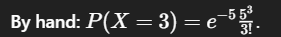


In [21]:
from scipy.stats import poisson
poisson.pmf(3,5)

0.1403738958142805

### 3D — Normal (z-score)

**Scenario:**  
Heights are distributed as  N(170, 10^2).  
Find P(X > 180).





In [23]:
from scipy.stats import norm
1-norm.cdf(180,170,10)

0.15865525393145707